In [2]:
#https://towardsdatascience.com/introduction-to-graphs-part-1-2de6cda8c5a5

import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt


/home/adimn/anaconda3/envs/venv-base/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


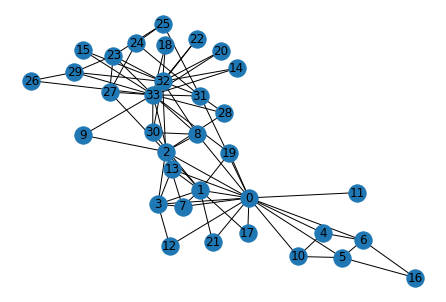

In [3]:
# Load the graph
G_karate = nx.karate_club_graph()
# Find key-values for the graph
pos = nx.spring_layout(G_karate)
# Plot the graph
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)

In [4]:
#np.array(list(G_karate.degree))
degree_freq=nx.degree_histogram(G_karate)

/home/adimn/anaconda3/envs/venv-base/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


<StemContainer object of 3 artists>

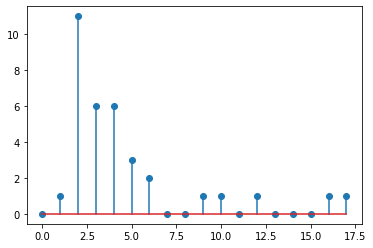

In [5]:
plt.stem(degree_freq)

In [6]:
pcc_longueurs=list(nx.all_pairs_shortest_path_length(G_karate))


In [11]:
pcc_longueurs[0][1]

{0: 0,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 1,
 17: 1,
 19: 1,
 21: 1,
 31: 1,
 30: 2,
 9: 2,
 27: 2,
 28: 2,
 32: 2,
 16: 2,
 33: 2,
 24: 2,
 25: 2,
 23: 3,
 14: 3,
 15: 3,
 18: 3,
 20: 3,
 22: 3,
 29: 3,
 26: 3}

In [12]:
n=34
distances=np.zeros((n,n))
# distances[i, j] is the length of the shortest path between i and j
for i in range(n):
    for j in range(n):
        distances[i, j] = pcc_longueurs[i][1][j]

In [13]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(distances)

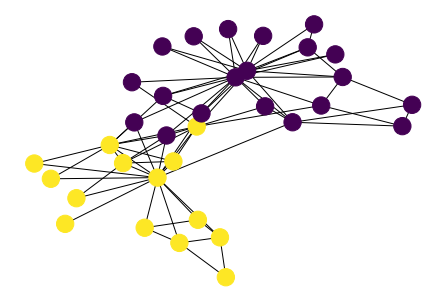

In [16]:
nx.draw(G_karate,  node_color = clustering)